## Disease detection with uncertainty about prediction

This notebook illustrates how to use the Bayesian CNN models presented in our [paper](https://www.biorxiv.org/content/early/2017/10/18/084210.article-metrics).

In [2]:
import datasets
import models

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Exemplary fundus image

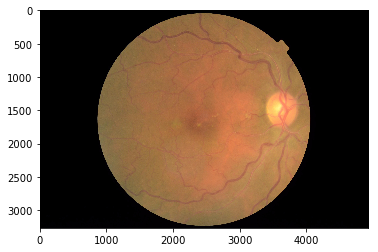

In [3]:
plt.imshow(plt.imread('data/example.jpeg'))

#### Crop, resize and enhance colour contrast

In [4]:
!python scripts/preprocess.py --source_dir=data --target_dir=data/processed

Resizing images in data to data/processed, this takes a while.
batch  1 / 1
done


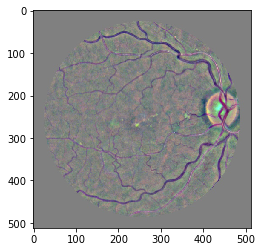

In [5]:
plt.imshow(plt.imread('data/processed/example.jpeg'))

#### Create a dataset object for image access by the networks

In [6]:
dataset = datasets.DatasetFromDirectory(path_data='data/processed', ext='.jpeg',
                                        preprocessing=datasets.KaggleDR.standard_normalize)

In [7]:
x = dataset.prepare_image(dataset.load_image('example'))[None, :]

### Detection of mild or more severe diabetic retinopathy

In [8]:
bcnn1 = models.BCNN(p_conv=0.2, last_layer='17', weights='models/weights_bcnn1_392bea6.npz', n_classes=2)

In [9]:
HEALTHY, DISEASED = 0, 1

#### Bayesian prediction with uncertainty

In [10]:
mc_samples = bcnn1.mc_samples(x, T=100)[0, :] # take the 0'th data sample because we have only one image

##### For both the healthy and diseased output units we have hundred predictions, i.e. Monte Carlo samples, each

In [11]:
mc_samples.shape

(2, 100)

##### The MC samples can be used to approximate the predictive distribution

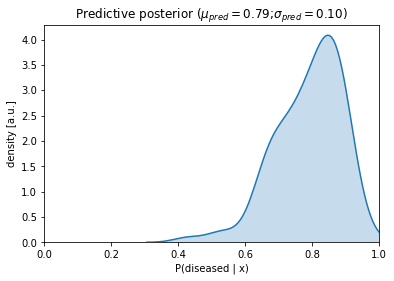

In [12]:
mu_pred = mc_samples[DISEASED, :].mean()
std_pred = mc_samples[DISEASED, :].std()

sns.kdeplot(mc_samples[DISEASED, :], shade=True)
plt.xlim(0, 1)
plt.xlabel('P(diseased | x)')
plt.ylabel('density [a.u.]')
plt.title('Predictive posterior ($\mu_{pred}=%.2f$;$\sigma_{pred}=%.2f$)' % (mu_pred, std_pred))

### Detection of moderate or more severe diabetic retinopathy just requires to change the model...

In [13]:
bcnn2 = models.BCNN(p_conv=0.2, last_layer='17', weights='models/weights_bcnn2_b69aadd.npz', n_classes=2)

In [14]:
mc_samples = bcnn2.mc_samples(x, T=100)[0, :] # take the 0'th data sample because we have only one image

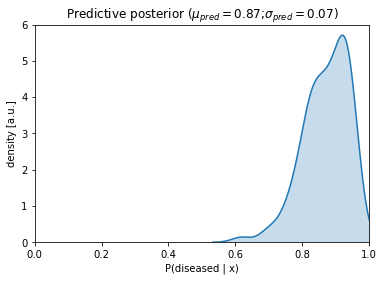

In [15]:
mu_pred = mc_samples[DISEASED, :].mean()
std_pred = mc_samples[DISEASED, :].std()

sns.kdeplot(mc_samples[DISEASED, :], shade=True)
plt.xlim(0, 1)
plt.xlabel('P(diseased | x)')
plt.ylabel('density [a.u.]')
plt.title('Predictive posterior ($\mu_{pred}=%.2f$;$\sigma_{pred}=%.2f$)' % (mu_pred, std_pred))